In [15]:
import numpy as np
import data_analysis
import data_visualisation
import subprocess
from matplotlib import pyplot as plt
import bjontegaard as bd

In [56]:
# anchor for gop 100
# test for gop 250
#crfs2 = [44, 35, 26, 23] 
#vbv_sizes2 = ['2M', '4M', '8M', '10M']
#crfs3 = [28, 24, 19, 14]
#vbv_sizes3 = ['3M', '6M', '9M', '12M']
rate_anchor = np.array([  269748.42767296,   825805.66037736,  2179954.08805031,
        2943794.33962264,  4017627.04402516,  4712486.79245283,
        8962938.36477987, 15598258.49056604])
psnr_anchor = np.array([28.42046386, 33.87093556, 38.52679762, 39.97622998, 41.44625474,
       42.23166478, 45.9041728 , 49.67154973])
rate_test = np.array([  249384.27672956,   777728.30188679,  2076861.63522013,
        2816396.22641509,  3864354.71698113,  4547725.1572327 ,
        8808463.52201258, 14997091.82389937])
psnr_test = np.array([28.30219764, 33.76050196, 38.46498002, 39.94271074, 41.43835416,
       42.23227907, 46.01539061, 49.85364552])

In [57]:
bd_rate = bd.bd_rate(rate_anchor, psnr_anchor, rate_test, psnr_test, method="akima")
bd_psnr = bd.bd_psnr(rate_anchor, psnr_anchor, rate_test, psnr_test, method="akima")
print(f"BD-Rate (Test 1): {bd_rate:.2f} %")
print(f"BD-PSNR (Test 1): {bd_psnr:.2f} dB")

BD-Rate (Test 1): -3.86 %
BD-PSNR (Test 1): 0.21 dB


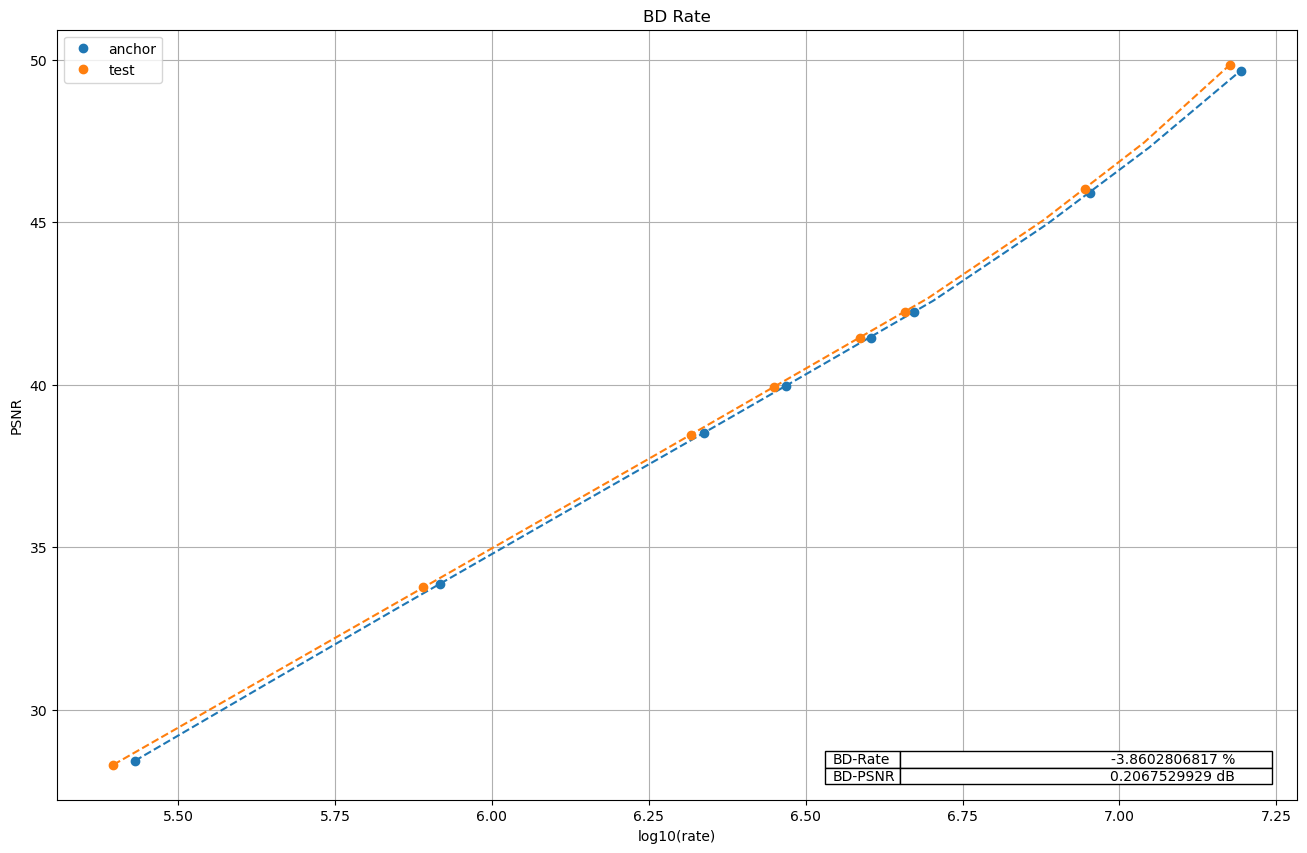

In [58]:
bd.plot_bd(rate_anchor, psnr_anchor, rate_test, psnr_test, filepath=None)

# The Experiment

# Define function - GoP 100&250

In [16]:
def run_experiment_100(crfs, vbv_sizes):
    for i in range(0, len(crfs)):
        crf = crfs[i]
        vbv_size = vbv_sizes[i]
        VARIABLE_SETTINGS = f' -crf {crf} -bufsize {vbv_size} '
    
        output = f' out-libx264-{crf}-{vbv_size}-100.mp4'
        
        subprocess.run(['ffmpeg ' + FIXED_SETTINGS_100 + VARIABLE_SETTINGS + output], shell=True)

In [17]:
def run_experiment_250(crfs, vbv_sizes):
    for i in range(0, len(crfs)):
        crf = crfs[i]
        vbv_size = vbv_sizes[i]
        VARIABLE_SETTINGS = f' -crf {crf} -bufsize {vbv_size} '
    
        output = f' out-libx264-{crf}-{vbv_size}-250.mp4'
        
        subprocess.run(['ffmpeg ' + FIXED_SETTINGS_250 + VARIABLE_SETTINGS + output], shell=True)

In [18]:
def get_analysis_data_100(crfs, vbv_sizes):
    analysis_data = []

    for i in range(0, len(crfs)):
        crf = crfs[i]
        vbv_size = vbv_sizes[i]
    
        target = f'out-libx264-{crf}-{vbv_size}-100.mp4'
        arguments = f"{REFERENCE} {target} {PROBE_FILE} {STATS_FILE}"
    
        subprocess.run(['./run-analysis.sh ' + arguments], shell=True)
        analysis_data.append(data_analysis.create_dataframe(STATS_FILE, PROBE_FILE))
        
    return analysis_data

In [19]:
def get_analysis_data_250(crfs, vbv_sizes):
    analysis_data = []

    for i in range(0, len(crfs)):
        crf = crfs[i]
        vbv_size = vbv_sizes[i]
    
        target = f'out-libx264-{crf}-{vbv_size}-250.mp4'
        arguments = f"{REFERENCE} {target} {PROBE_FILE} {STATS_FILE}"
    
        subprocess.run(['./run-analysis.sh ' + arguments], shell=True)
        analysis_data.append(data_analysis.create_dataframe(STATS_FILE, PROBE_FILE))
        
    return analysis_data

In [20]:
def plot_results(data):
    measured_bitrates = []
    measured_average_psnr = []

    for df in data:
        measured_bitrates.append(sum(df['size']) * 8 / 5)
        measured_average_psnr.append(np.mean(df['PSNR']))
        
    plt.plot(measured_bitrates, measured_average_psnr, 'o-')

In [21]:
def plot_all_results(all_data):
    for index, data in enumerate(all_data):
        measured_bitrates = []
        measured_average_psnr = []

        for df in data:
            measured_bitrates.append(sum(df['size']) * 8 / 5)
            measured_average_psnr.append(np.mean(df['PSNR']))
        
        plt.plot(measured_bitrates, measured_average_psnr, 'o-', label=f'run-{index}')
    
    plt.xlabel("Measured Bitrate (bps)")
    plt.ylabel("Quality PSNR (dB)")
    plt.legend() 
    plt.show()

In [22]:
STATS_FILE = "stats.json"
PROBE_FILE = "probe.json"

REFERENCE = "Content/all.mp4"

In [23]:
crfs = [50, 40, 30, 20]
vbv_sizes = ['2M', '4M', '8M', '10M']

In [24]:
crfs2 = [44, 35, 26, 23]
vbv_sizes2 = ['2M', '4M', '8M', '10M']

In [25]:
crfs3 = [28, 24, 19, 14]
vbv_sizes3 = ['3M', '6M', '9M', '12M']

In [26]:
crfs4 = [33, 30, 21, 17]
vbv_sizes4 = ['3M', '6M', '9M', '12M']

# Settings - GoP 100&250

In [27]:
FIXED_SETTINGS_100 = f"-i {REFERENCE} -c:v libx264 -pix_fmt yuv420p -g 100 -keyint_min 100 -bf 3 -y "

In [28]:
FIXED_SETTINGS_250 = f"-i {REFERENCE} -c:v libx264 -pix_fmt yuv420p -g 250 -keyint_min 250 -bf 3 -y "

# Run - GoP 100&250

In [29]:
run_experiment_100(crfs, vbv_sizes)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x600002104000] video:689kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.661477%
frame=  318 fps=103 q=-1.0 Lsize=     693kB time=00:00:12.60 bitrate= 450.7kbits/s speed=4.08x    
[libx264 @ 0x126805f70] frame I:5     Avg QP:37.55  size: 30454
[libx264 @ 0x126805f70] frame P:80    Avg QP:40.63  size:  3172
[libx264 @ 0x126805f70] frame B:233   Avg QP:44.84  size:  1281
[libx264 @ 0x126805f70] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x126805f70] mb I  I16..4: 25.2% 72.6%  2.2%
[libx264 @ 0x126805f70] mb P  I16..4:  2.4%  1.9%  0.0%  P16..4: 13.2%  0.5%  1.9%  0.0%  0.0%    skip:80.2%
[libx264 @ 0x126805f70] mb B  I16..4:  0.1%  0.1%  0.0%  B16..8: 14.0%  0.2%  0.0%  direct: 0.0%  skip:85.7%  L0:39.5% L1:60.4% BI: 0.1%
[libx264 @ 0x126805f70] 8x8 transform intra:60.8% inter:98.8%
[libx264 @ 0x126805f70] coded y,uvDC,uvAC intra: 21.9% 36.4% 8.7% inter: 0.8% 0.6% 0.0%
[libx264 @ 0x126805f70] i16 v,h,dc,p: 19% 54%  7% 20%
[libx

[out#0/mp4 @ 0x6000030c0480] video:11964kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.039221%
frame=  318 fps= 49 q=-1.0 Lsize=   11969kB time=00:00:12.60 bitrate=7781.4kbits/s speed=1.93x    
[libx264 @ 0x138e07380] frame I:5     Avg QP:17.68  size:248965
[libx264 @ 0x138e07380] frame P:80    Avg QP:20.31  size: 68546
[libx264 @ 0x138e07380] frame B:233   Avg QP:23.44  size: 23699
[libx264 @ 0x138e07380] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x138e07380] mb I  I16..4:  3.9% 78.3% 17.9%
[libx264 @ 0x138e07380] mb P  I16..4:  1.0% 12.1%  1.7%  P16..4: 40.3% 23.8% 13.0%  0.0%  0.0%    skip: 8.0%
[libx264 @ 0x138e07380] mb B  I16..4:  0.1%  1.9%  0.5%  B16..8: 42.2%  6.5%  2.0%  direct: 4.6%  skip:42.2%  L0:40.7% L1:50.7% BI: 8.5%
[libx264 @ 0x138e07380] 8x8 transform intra:79.6% inter:74.3%
[libx264 @ 0x138e07380] coded y,uvDC,uvAC intra: 88.2% 80.4% 39.2% inter: 23.6% 28.1% 2.6%
[libx264 @ 0x138e07380] i16 v,h,dc,p:  9% 75%  5% 10%


In [30]:
run_experiment_100(crfs2, vbv_sizes2)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x600003afc480] video:1282kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.356504%
frame=  318 fps= 92 q=-1.0 Lsize=    1287kB time=00:00:12.60 bitrate= 836.6kbits/s speed=3.66x    
[libx264 @ 0x130706880] frame I:5     Avg QP:32.59  size: 50010
[libx264 @ 0x130706880] frame P:80    Avg QP:35.34  size:  6179
[libx264 @ 0x130706880] frame B:233   Avg QP:39.11  size:  2437
[libx264 @ 0x130706880] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x130706880] mb I  I16..4: 16.3% 77.9%  5.8%
[libx264 @ 0x130706880] mb P  I16..4:  2.8%  3.7%  0.1%  P16..4: 21.2%  1.3%  0.5%  0.0%  0.0%    skip:70.4%
[libx264 @ 0x130706880] mb B  I16..4:  0.1%  0.2%  0.0%  B16..8: 21.6%  0.5%  0.0%  direct: 0.1%  skip:77.5%  L0:43.2% L1:56.5% BI: 0.3%
[libx264 @ 0x130706880] 8x8 transform intra:66.9% inter:94.6%
[libx264 @ 0x130706880] coded y,uvDC,uvAC intra: 35.0% 38.6% 11.5% inter: 2.2% 1.1% 0.0%
[libx264 @ 0x130706880] i16 v,h,dc,p: 10% 69%  4% 17%
[li

[out#0/mp4 @ 0x600003abc480] video:7317kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.063754%
frame=  318 fps= 56 q=-1.0 Lsize=    7322kB time=00:00:12.60 bitrate=4760.4kbits/s speed=2.24x    
[libx264 @ 0x1358075b0] frame I:5     Avg QP:20.68  size:192357
[libx264 @ 0x1358075b0] frame P:80    Avg QP:23.24  size: 39282
[libx264 @ 0x1358075b0] frame B:233   Avg QP:26.29  size: 14540
[libx264 @ 0x1358075b0] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x1358075b0] mb I  I16..4:  4.9% 78.0% 17.0%
[libx264 @ 0x1358075b0] mb P  I16..4:  1.5%  9.4%  1.7%  P16..4: 43.2% 14.8%  8.1%  0.0%  0.0%    skip:21.3%
[libx264 @ 0x1358075b0] mb B  I16..4:  0.1%  1.3%  0.2%  B16..8: 37.2%  4.8%  1.2%  direct: 2.7%  skip:52.4%  L0:41.1% L1:53.5% BI: 5.4%
[libx264 @ 0x1358075b0] 8x8 transform intra:76.2% inter:78.7%
[libx264 @ 0x1358075b0] coded y,uvDC,uvAC intra: 79.9% 66.0% 26.7% inter: 15.3% 16.1% 0.7%
[libx264 @ 0x1358075b0] i16 v,h,dc,p:  8% 78%  3% 10%
[

In [31]:
run_experiment_100(crfs3, vbv_sizes3)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x600002b8c840] video:6238kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.074530%
frame=  318 fps= 59 q=-1.0 Lsize=    6243kB time=00:00:12.60 bitrate=4058.9kbits/s speed=2.33x    
[libx264 @ 0x14d607d60] frame I:5     Avg QP:21.67  size:170966
[libx264 @ 0x14d607d60] frame P:80    Avg QP:24.23  size: 32957
[libx264 @ 0x14d607d60] frame B:233   Avg QP:27.26  size: 12429
[libx264 @ 0x14d607d60] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x14d607d60] mb I  I16..4:  6.0% 76.9% 17.1%
[libx264 @ 0x14d607d60] mb P  I16..4:  1.7%  8.9%  1.5%  P16..4: 41.7% 12.0%  6.4%  0.0%  0.0%    skip:27.7%
[libx264 @ 0x14d607d60] mb B  I16..4:  0.1%  1.2%  0.2%  B16..8: 35.8%  4.3%  0.9%  direct: 2.3%  skip:55.1%  L0:41.6% L1:53.8% BI: 4.6%
[libx264 @ 0x14d607d60] 8x8 transform intra:75.5% inter:79.9%
[libx264 @ 0x14d607d60] coded y,uvDC,uvAC intra: 76.9% 61.8% 24.1% inter: 13.2% 12.6% 0.4%
[libx264 @ 0x14d607d60] i16 v,h,dc,p:  9% 78%  3% 10%
[

[out#0/mp4 @ 0x600000698480] video:24220kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.019890%
frame=  318 fps= 36 q=-1.0 Lsize=   24225kB time=00:00:12.60 bitrate=15749.9kbits/s speed=1.44x    
[libx264 @ 0x12a0070e0] frame I:5     Avg QP:11.63  size:395723
[libx264 @ 0x12a0070e0] frame P:80    Avg QP:14.34  size:144995
[libx264 @ 0x12a0070e0] frame B:233   Avg QP:17.64  size: 48164
[libx264 @ 0x12a0070e0] consecutive B-frames:  1.9%  0.6%  1.9% 95.6%
[libx264 @ 0x12a0070e0] mb I  I16..4:  3.8% 74.1% 22.0%
[libx264 @ 0x12a0070e0] mb P  I16..4:  0.5% 13.2%  2.3%  P16..4: 27.6% 31.0% 22.6%  0.0%  0.0%    skip: 2.8%
[libx264 @ 0x12a0070e0] mb B  I16..4:  0.0%  1.8%  0.8%  B16..8: 44.0% 13.0%  4.4%  direct: 8.0%  skip:28.0%  L0:40.8% L1:43.7% BI:15.6%
[libx264 @ 0x12a0070e0] 8x8 transform intra:77.1% inter:62.8%
[libx264 @ 0x12a0070e0] coded y,uvDC,uvAC intra: 94.4% 92.4% 67.7% inter: 40.6% 41.3% 8.7%
[libx264 @ 0x12a0070e0] i16 v,h,dc,p: 17% 56% 10% 16%

In [32]:
run_experiment_250(crfs2, vbv_sizes2)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x600002624480] video:1208kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.379512%
frame=  318 fps= 84 q=-1.0 Lsize=    1212kB time=00:00:12.60 bitrate= 788.1kbits/s speed=3.33x    
[libx264 @ 0x135f06880] frame I:3     Avg QP:33.04  size: 52957
[libx264 @ 0x135f06880] frame P:80    Avg QP:35.36  size:  6232
[libx264 @ 0x135f06880] frame B:235   Avg QP:39.01  size:  2462
[libx264 @ 0x135f06880] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x135f06880] mb I  I16..4: 14.2% 80.1%  5.7%
[libx264 @ 0x135f06880] mb P  I16..4:  2.8%  3.7%  0.1%  P16..4: 21.1%  1.3%  0.5%  0.0%  0.0%    skip:70.4%
[libx264 @ 0x135f06880] mb B  I16..4:  0.1%  0.2%  0.0%  B16..8: 21.8%  0.5%  0.0%  direct: 0.1%  skip:77.2%  L0:43.7% L1:56.0% BI: 0.3%
[libx264 @ 0x135f06880] 8x8 transform intra:65.3% inter:94.7%
[libx264 @ 0x135f06880] coded y,uvDC,uvAC intra: 32.8% 34.6% 8.5% inter: 2.2% 1.2% 0.0%
[libx264 @ 0x135f06880] i16 v,h,dc,p:  8% 72%  4% 15%
[lib

[out#0/mp4 @ 0x600001480240] video:7061kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.066009%
frame=  318 fps= 50 q=-1.0 Lsize=    7066kB time=00:00:12.60 bitrate=4594.1kbits/s speed=1.99x    
[libx264 @ 0x13e806090] frame I:3     Avg QP:21.17  size:212459
[libx264 @ 0x13e806090] frame P:80    Avg QP:23.23  size: 39770
[libx264 @ 0x13e806090] frame B:235   Avg QP:26.26  size: 14516
[libx264 @ 0x13e806090] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x13e806090] mb I  I16..4:  4.2% 79.1% 16.8%
[libx264 @ 0x13e806090] mb P  I16..4:  1.5%  9.4%  1.8%  P16..4: 43.6% 14.8%  8.1%  0.0%  0.0%    skip:20.7%
[libx264 @ 0x13e806090] mb B  I16..4:  0.1%  1.3%  0.2%  B16..8: 36.6%  4.8%  1.1%  direct: 2.7%  skip:53.0%  L0:41.4% L1:53.1% BI: 5.5%
[libx264 @ 0x13e806090] 8x8 transform intra:76.1% inter:78.6%
[libx264 @ 0x13e806090] coded y,uvDC,uvAC intra: 79.3% 63.5% 22.1% inter: 15.4% 16.2% 0.7%
[libx264 @ 0x13e806090] i16 v,h,dc,p:  6% 82%  3%  9%
[

In [33]:
run_experiment_250(crfs3, vbv_sizes3)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x600001140840] video:6000kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.077486%
frame=  318 fps= 53 q=-1.0 Lsize=    6005kB time=00:00:12.60 bitrate=3904.2kbits/s speed= 2.1x    
[libx264 @ 0x121606f10] frame I:3     Avg QP:22.14  size:188172
[libx264 @ 0x121606f10] frame P:80    Avg QP:24.21  size: 33301
[libx264 @ 0x121606f10] frame B:235   Avg QP:27.22  size: 12405
[libx264 @ 0x121606f10] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x121606f10] mb I  I16..4:  5.3% 77.9% 16.8%
[libx264 @ 0x121606f10] mb P  I16..4:  1.7%  9.0%  1.5%  P16..4: 41.9% 12.1%  6.5%  0.0%  0.0%    skip:27.3%
[libx264 @ 0x121606f10] mb B  I16..4:  0.1%  1.2%  0.2%  B16..8: 35.3%  4.3%  0.9%  direct: 2.3%  skip:55.6%  L0:41.7% L1:53.7% BI: 4.6%
[libx264 @ 0x121606f10] 8x8 transform intra:75.6% inter:79.8%
[libx264 @ 0x121606f10] coded y,uvDC,uvAC intra: 76.1% 58.8% 19.5% inter: 13.2% 12.7% 0.5%
[libx264 @ 0x121606f10] i16 v,h,dc,p:  7% 81%  3%  9%
[

[out#0/mp4 @ 0x6000027f0000] video:23286kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.020721%
frame=  318 fps= 35 q=-1.0 Lsize=   23291kB time=00:00:12.60 bitrate=15143.1kbits/s speed=1.37x    
[libx264 @ 0x1317054c0] frame I:3     Avg QP:12.09  size:367555
[libx264 @ 0x1317054c0] frame P:80    Avg QP:14.32  size:145682
[libx264 @ 0x1317054c0] frame B:235   Avg QP:17.58  size: 47181
[libx264 @ 0x1317054c0] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x1317054c0] mb I  I16..4:  4.7% 75.6% 19.7%
[libx264 @ 0x1317054c0] mb P  I16..4:  0.5% 13.1%  2.3%  P16..4: 27.6% 30.7% 23.0%  0.0%  0.0%    skip: 2.7%
[libx264 @ 0x1317054c0] mb B  I16..4:  0.0%  1.8%  0.8%  B16..8: 42.1% 12.6%  4.3%  direct: 7.8%  skip:30.6%  L0:41.3% L1:42.8% BI:15.9%
[libx264 @ 0x1317054c0] 8x8 transform intra:77.5% inter:62.5%
[libx264 @ 0x1317054c0] coded y,uvDC,uvAC intra: 94.0% 91.9% 65.4% inter: 39.2% 39.8% 8.5%
[libx264 @ 0x1317054c0] i16 v,h,dc,p: 18% 60% 10% 12%

In [34]:
run_experiment_250(crfs4, vbv_sizes4)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

[out#0/mp4 @ 0x60000325c840] video:2406kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.191108%
frame=  318 fps= 68 q=-1.0 Lsize=    2411kB time=00:00:12.60 bitrate=1567.5kbits/s speed= 2.7x    
[libx264 @ 0x14ae08990] frame I:3     Avg QP:28.12  size: 90307
[libx264 @ 0x14ae08990] frame P:80    Avg QP:30.26  size: 12788
[libx264 @ 0x14ae08990] frame B:235   Avg QP:33.49  size:  4976
[libx264 @ 0x14ae08990] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x14ae08990] mb I  I16..4:  8.1% 81.5% 10.3%
[libx264 @ 0x14ae08990] mb P  I16..4:  2.6%  6.5%  0.3%  P16..4: 29.2%  3.6%  1.5%  0.0%  0.0%    skip:56.2%
[libx264 @ 0x14ae08990] mb B  I16..4:  0.1%  0.6%  0.0%  B16..8: 28.4%  1.7%  0.2%  direct: 0.7%  skip:68.4%  L0:43.5% L1:55.3% BI: 1.1%
[libx264 @ 0x14ae08990] 8x8 transform intra:73.6% inter:86.7%
[libx264 @ 0x14ae08990] coded y,uvDC,uvAC intra: 53.0% 39.4% 12.1% inter: 5.3% 2.9% 0.0%
[libx264 @ 0x14ae08990] i16 v,h,dc,p:  7% 79%  3% 11%
[li

[out#0/mp4 @ 0x6000038f00c0] video:17418kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.027276%
frame=  318 fps= 37 q=-1.0 Lsize=   17423kB time=00:00:12.60 bitrate=11327.6kbits/s speed=1.46x    
[libx264 @ 0x146e04fb0] frame I:3     Avg QP:15.11  size:315691
[libx264 @ 0x146e04fb0] frame P:80    Avg QP:17.32  size:106859
[libx264 @ 0x146e04fb0] frame B:235   Avg QP:20.55  size: 35488
[libx264 @ 0x146e04fb0] consecutive B-frames:  0.9%  1.3%  0.9% 96.9%
[libx264 @ 0x146e04fb0] mb I  I16..4:  4.4% 76.8% 18.8%
[libx264 @ 0x146e04fb0] mb P  I16..4:  0.7% 12.4%  2.0%  P16..4: 33.5% 29.2% 18.6%  0.0%  0.0%    skip: 3.6%
[libx264 @ 0x146e04fb0] mb B  I16..4:  0.1%  1.8%  0.6%  B16..8: 43.4%  9.7%  3.0%  direct: 6.7%  skip:34.7%  L0:42.1% L1:45.8% BI:12.1%
[libx264 @ 0x146e04fb0] 8x8 transform intra:78.4% inter:68.6%
[libx264 @ 0x146e04fb0] coded y,uvDC,uvAC intra: 91.6% 88.9% 53.7% inter: 33.6% 36.4% 6.0%
[libx264 @ 0x146e04fb0] i16 v,h,dc,p: 12% 72%  6%  9%

In [35]:
run1_gop_100_data = get_analysis_data_100(crfs, vbv_sizes)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-50-2M-100.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 130 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 127 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoH

In [36]:
run2_gop_100_data = get_analysis_data_100(crfs2, vbv_sizes2)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-44-2M-100.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 272 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 269 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoH

In [37]:
run3_gop_100_data = get_analysis_data_100(crfs3, vbv_sizes3)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-28-3M-100.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 2182 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 2179 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : Vide

In [38]:
run2_gop_250_data = get_analysis_data_250(crfs2, vbv_sizes2)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-44-2M-250.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 252 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 249 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoH

In [39]:
run3_gop_250_data = get_analysis_data_250(crfs3, vbv_sizes3)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-28-3M-250.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 2079 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 2076 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : Vide

In [40]:
run4_gop_250_data = get_analysis_data_250(crfs4, vbv_sizes4)

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out-libx264-33-3M-250.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 1021 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 1018 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc60.31.102 libx264
Input #1, mov,mp4,m4a,3gp,3g2,mj2, from 'Content/all.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf60.16.100
  Duration: 00:00:12.72, start: 0.000000, bitrate: 11535 kb/s
  Stream #1:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 11532 kb/s, 25 fps, 25 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : Vide

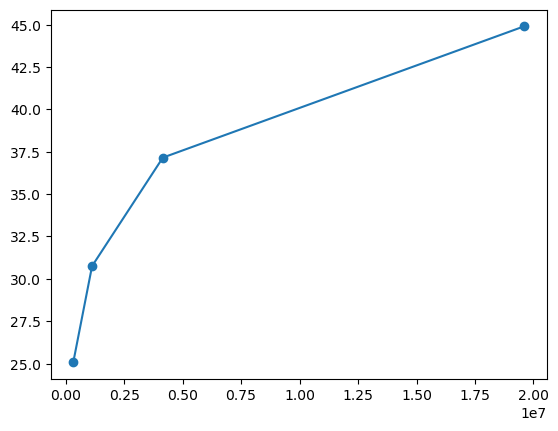

In [41]:
#crfs = [50, 40, 30, 20]
#vbv_sizes = ['2M', '4M', '8M', '10M']
plot_results(run1_gop_100_data)

In [42]:
all_data_100vs250 = [run2_gop_100_data, run2_gop_250_data]

In [43]:
all_data = [run2_gop_250_data, run3_gop_250_data, run4_gop_250_data]

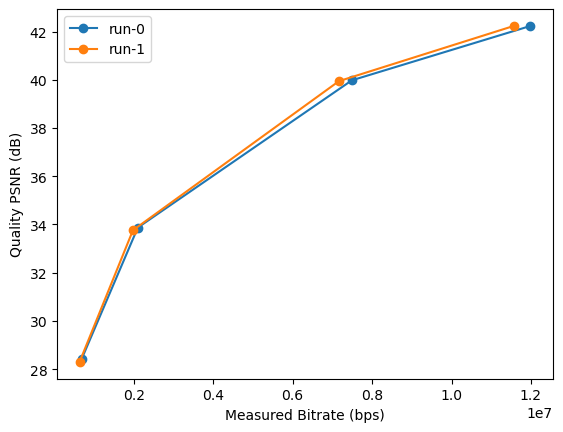

In [44]:
#gop 100vs250
#crfs2 = [44, 35, 26, 23]
#vbv_sizes2 = ['2M', '4M', '8M', '10M']

plot_all_results(all_data_100vs250)

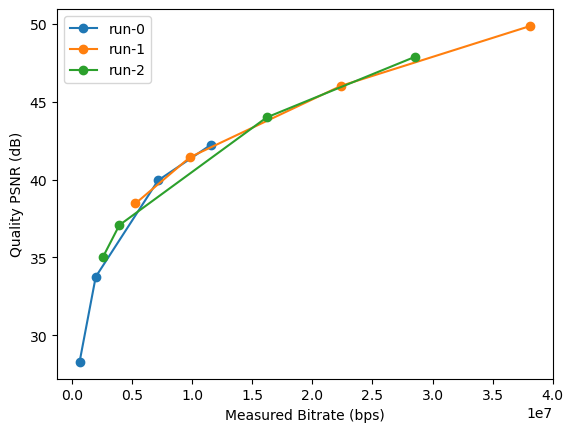

In [45]:
#gop 250 has been chosen according to BD-Rate

#test other CRFs
#crfs2 = [44, 35, 26, 23] 
#vbv_sizes2 = ['2M', '4M', '8M', '10M']
#crfs3 = [28, 24, 19, 14]
#vbv_sizes3 = ['3M', '6M', '9M', '12M']
#crfs4 = [33, 30, 21, 17]
#vbv_sizes4 = ['3M', '6M', '9M', '12M']

#all [44,35, 33, 30， 28,26, 24,23,21,19,17,14]
plot_all_results(all_data)

In [46]:
#print bitrates and distortions - which are use in BD-rate
#crfs2 = [44, 35, 26, 23] 
#vbv_sizes2 = ['2M', '4M', '8M', '10M']
#crfs3 = [28, 24, 19, 14]
#vbv_sizes3 = ['3M', '6M', '9M', '12M']
def get_db_data(data, metric='PSNR', frame_rate=25):
    bitrates = []
    distortion = []
    
    for d in data:
        bitrates.append(sum(d['size']) * 8 / (len(d) / frame_rate))
        distortion.append(np.mean(d[metric]))
        
    return (bitrates, distortion) 

In [47]:
(bitrates_2_100, distortions_2_100) = get_db_data(run2_gop_100_data)

In [48]:
(bitrates_3_100, distortions_3_100) = get_db_data(run3_gop_100_data)

In [49]:
(bitrates_2_250, distortions_2_250) = get_db_data(run2_gop_250_data)

In [50]:
(bitrates_3_250, distortions_3_250) = get_db_data(run3_gop_250_data)

In [51]:
(bitrates_2_100, distortions_2_100)

([269748.42767295596, 825805.6603773584, 2943794.3396226414, 4712486.79245283],
 [28.42046386163522,
  33.870935559748425,
  39.976229984276735,
  42.23166477987421])

In [52]:
(bitrates_3_100, distortions_3_100)

([2179954.088050314, 4017627.044025157, 8962938.364779875, 15598258.490566038],
 [38.52679762264151, 41.44625473584906, 45.90417279559749, 49.6715497327044])

In [53]:
(bitrates_2_250, distortions_2_250)

([249384.27672955973, 777728.3018867924, 2816396.226415094, 4547725.157232705],
 [28.302197635220132,
  33.76050195597484,
  39.942710735849055,
  42.232279066037734])

In [54]:
(bitrates_3_250, distortions_3_250)

([2076861.6352201258, 3864354.716981132, 8808463.522012578, 14997091.82389937],
 [38.464980022012575,
  41.43835416037736,
  46.015390610062894,
  49.85364551886793])